#Semantic Segmentation using SegNet (VGG16 & ResNet50)
## Submitted By: Mariam Mariam
##Registration No: 361298

###1. Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

###2. Library Installation

In [7]:
import glob
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
import imgaug as ia
from imgaug import augmenters as iaa
import tensorflow as tf
from tensorflow import keras
import imgaug as ia
from imgaug import augmenters as iaa
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


from keras.preprocessing.image import ImageDataGenerator

In [8]:
import pandas as pd
import numpy as np
import sys
import os
import random
from pathlib import Path

# Image processing
import imageio
import cv2
import skimage.transform
#from skimage.transform import rescale, resize, downscale_local_mean
# Charts
import matplotlib.pyplot as plt
import seaborn as sns

# ML, statistics
import scipy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

# Tensorflow
#from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception 

from tensorflow.keras.losses import CategoricalCrossentropy, MeanSquaredError, SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.layers import Input
from keras.models import Model
!pip install tensorflow-addons
!pip install tensorflow-Ranking
import tensorflow_ranking as tfr
import tensorflow_addons as tfa
import tensorflow_probability as tfp

from tensorflow.keras.utils import plot_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 30.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 141 kB 34.1 MB/s 
     |████████████████████████████████| 462 kB 62.3 MB/s 


In [9]:
import os
import skimage.io as io
import torch
import torch.cuda
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from IPython.core.display import HTML
from torch.utils.data import Dataset, DataLoader
import cv2
import glob
import numpy
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import sklearn.externals
import joblib

In [ ]:
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

In [2]:
!pip install keras-segmentation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 13.2 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29071 sha256=989061e669fe1a2817791f06b4403c6496ad3465c2a071f260a5b0663237e3fd
  Stored in directory: /root/.cache/pip/wheels/68/dc/b3/596a3e2461ba16e935ef31661c26e823f841cfb577cec4c47a
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [12]:
!pip install segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 7.4 MB/s 


In [ ]:
import sys
import zipfile
os.chdir('/content/drive/MyDrive/assignment3/SegNet')

###3. Custom Metrics
Dice Coeffecient is not implemented in library. Library module 'train.py' has been modified to include it. Ony IU Score and Crossentropy is implemented in library.

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

###4. DataLoader
Dataset's train folder is splitted into train-validation (0.8 & 0.2) using split-folder library and splitted dataset is uploaded on GDrive for ease of work with this library.We can also use the following function.

In [ ]:
test_label_dir=os.path.join('/content/drive/MyDrive/assignment3/A3_Dataset/dataset1/annotations_prepped_test')
train_image_dir=os.path.join('/content/drive/MyDrive/assignment3/A3_Dataset/dataset1/images_prepped_train')
train_label_dir=os.path.join('/content/drive/MyDrive/assignment3/A3_Dataset/dataset1/annotations_prepped_train')
test_image_dir=os.path.join('/content/drive/MyDrive/assignment3/A3_Dataset/dataset1/images_prepped_test')

In [ ]:
train_image = [os.path.join(train_image_dir,fname) for fname in os.listdir(train_image_dir)[:]]
train_label = [os.path.join(train_label_dir,fname) for fname in os.listdir(train_label_dir)[:]]
test_image = [os.path.join(test_image_dir,fname) for fname in os.listdir(test_image_dir)[:]]
test_label = [os.path.join(test_label_dir,fname) for fname in os.listdir(test_label_dir)[:]]

image_size = (224,224)

#function to load data
def open_image(img):
    return np.array(Image.open(img).resize(image_size, Image.NEAREST))

train_images = np.stack([open_image(i) for i in train_image])
train_labels = np.stack([open_image(i) for i in train_label])
test_images = np.stack([open_image(i) for i in test_image])
test_labels = np.stack([open_image(i) for i in test_label])

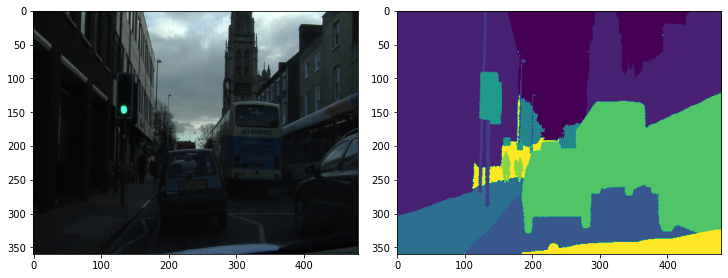

In [ ]:
original_image = "/content/drive/MyDrive/assignment3/A3_Dataset/dataset1_splitted/images_prepped_train/0001TP_006690.png"
label_image_semantic = "/content/drive/MyDrive/assignment3/A3_Dataset/dataset1_splitted/annotations_prepped_train/0001TP_006690.png"

fig, axs = plt.subplots(1, 2, figsize=(10, 8), constrained_layout=True)

axs[0].imshow( Image.open(original_image))
axs[0].grid(False)

label_image_semantic = Image.open(label_image_semantic)
label_image_semantic = np.asarray(label_image_semantic)
axs[1].imshow(label_image_semantic)
axs[1].grid(False)

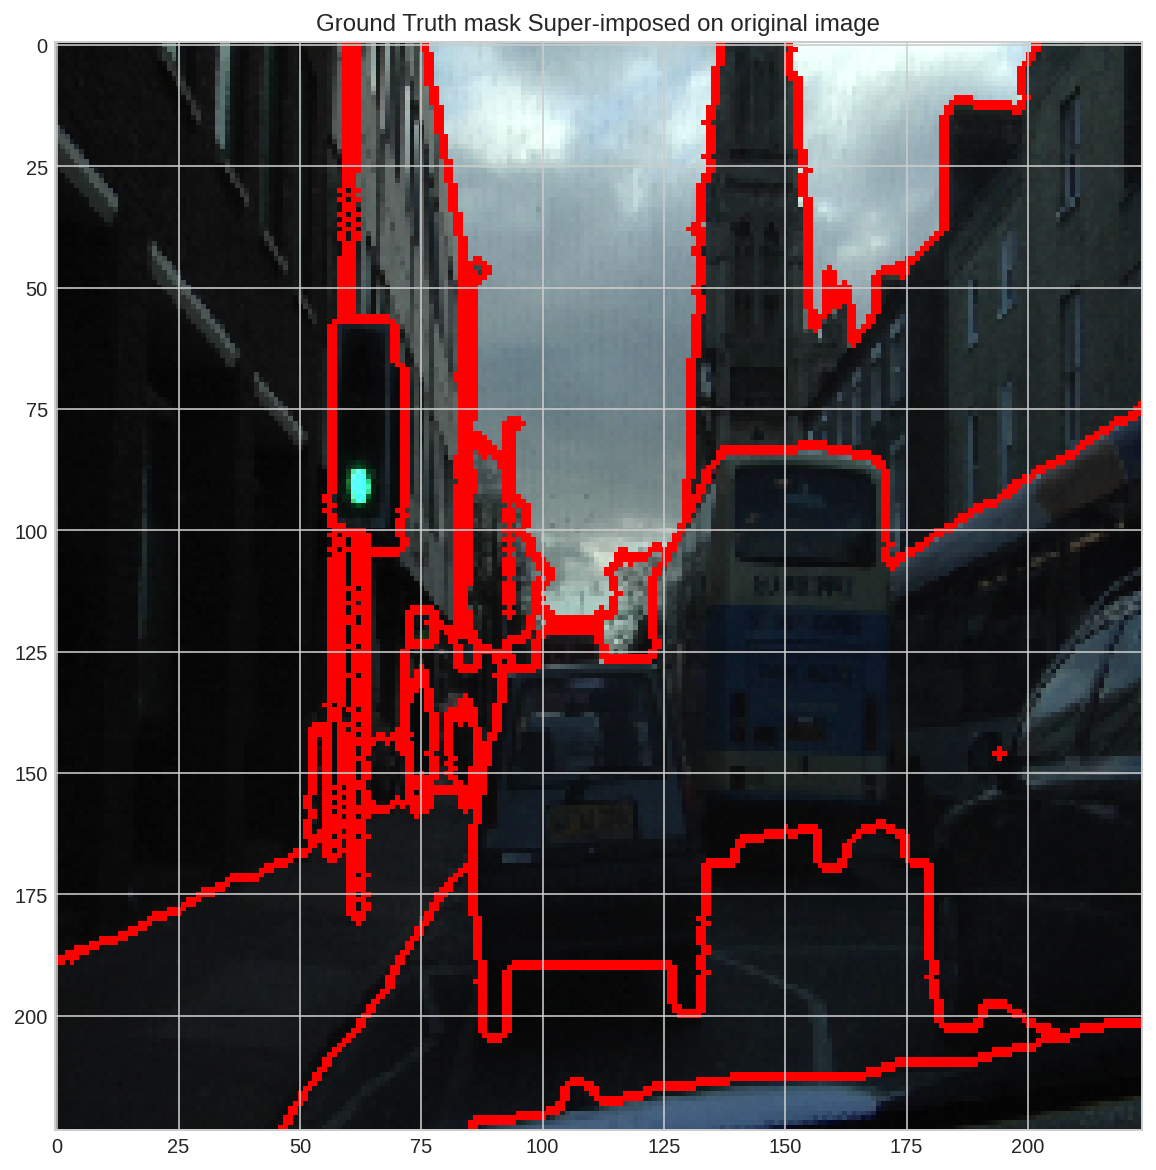

In [ ]:
plt.figure(figsize=(10,10))
edges_pz = mark_boundaries(image, mask,color=(1,0,0), mode='thin')
plt.imshow(edges_pz)
plt.title('Ground Truth mask Super‐imposed on original image')
plt.show()

###7. Custom Data Augmentation
Augmentation function is also manually modified in library and then used.

In [ ]:
def aug_ment():
    return iaa.OneOf([
        iaa.Sequential([iaa.Fliplr(0.5), iaa.Flipud(0.2)]),
        iaa.CropAndPad(percent=(-0.05, 0.1),
                       pad_mode='constant',
                       pad_cval=(0, 255)),
        iaa.Crop(percent=(0.0, 0.1)),
        iaa.Crop(percent=(0.3, 0.5)),
        iaa.Crop(percent=(0.3, 0.5)),
        iaa.Crop(percent=(0.3, 0.5)),
        iaa.Sequential([
            iaa.Affine(
                    # scale images to 80-120% of their size,
                    # individually per axis
                    scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                    # translate by -20 to +20 percent (per axis)
                    translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
                    rotate=(-45, 45),  # rotate by -45 to +45 degrees
                    shear=(-16, 16),  # shear by -16 to +16 degrees
                    # use nearest neighbour or bilinear interpolation (fast)
                    order=[0, 1],
                    # if mode is constant, use a cval between 0 and 255
                    mode='constant',
                    cval=(0, 255),
                    # use any of scikit-image's warping modes
                    # (see 2nd image from the top for examples)
            ),
                   iaa.Sometimes(0.2, iaa.GaussianBlur(sigma=(0, 3.0))),
                   iaa.Sometimes(0.2, iaa.MotionBlur(k=15, angle=[-45, 45])),
                   iaa.Sometimes(0.2, iaa.MultiplyHue((0.5, 1.5))),
                   iaa.Sometimes(0.2, iaa.MultiplySaturation((0.5, 1.5))),
                   iaa.Sometimes(0.34, iaa.MultiplyHueAndSaturation((0.5, 1.5),
                                                         per_channel=True)),])
    ])

###6. SegNet with VGG-16 Backbone

In [ ]:
from keras_segmentation.models.segnet import vgg_segnet

model_vgg = vgg_segnet(n_classes = 11, input_height=320, input_width=640 )

Using TensorFlow backend.


58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
model_vgg.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 320, 640, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 320, 640, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 320, 640, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 160, 320, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 160, 320, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 160, 320, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 80, 160, 128)      0   

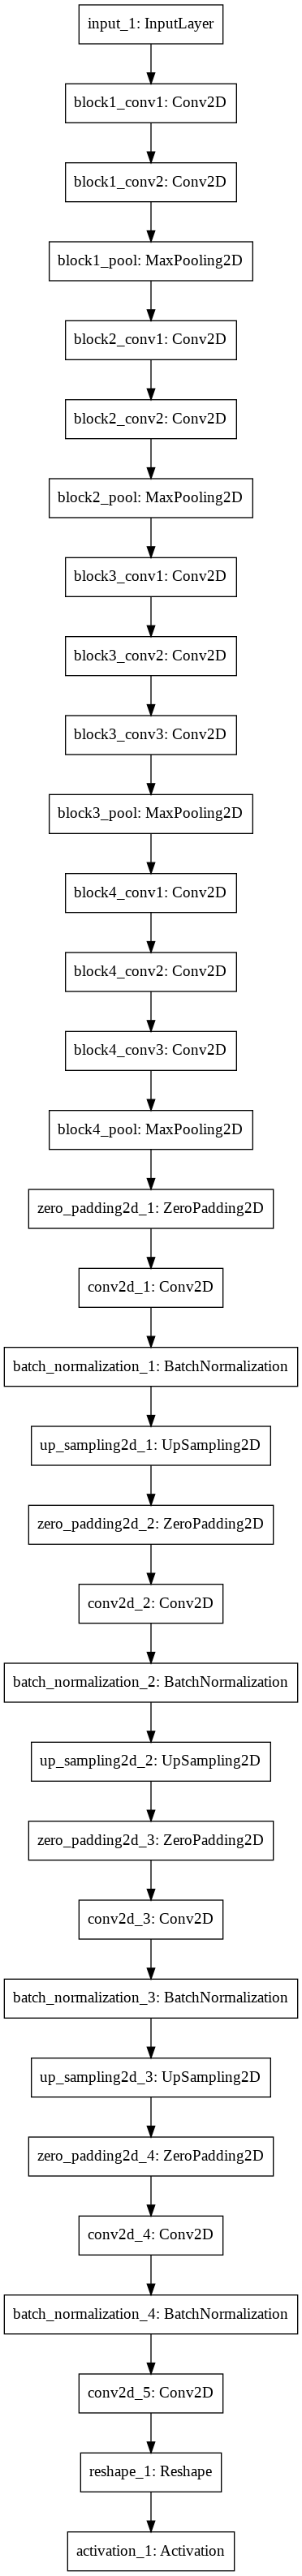

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_vgg)

In [ ]:
#model.add_metric()
#model.train()
batch_size = 8

history_vgg = model_vgg.train(
    train_images =  "/content/drive/MyDrive/assignment3/A3_Dataset/dataset1_splitted/images_prepped_train/",
    train_annotations = "/content/drive/MyDrive/assignment3/A3_Dataset/dataset1_splitted/annotations_prepped_train/",
    validate=True,
    val_images="/content/drive/MyDrive/assignment3/A3_Dataset/dataset1_splitted/images_prepped_valid",
    val_annotations="/content/drive/MyDrive/assignment3/A3_Dataset/dataset1_splitted/annotations_prepped_valid",
    checkpoints_path = "/tmp/vgg_segnet_111" , 
    epochs=30,
    do_augment=True, # enable augmentation, 
    augmentation_name = 'aug_all',
    verify_dataset=False,
    batch_size = batch_size,
    val_batch_size = batch_size,
    steps_per_epoch = np.ceil(294 / batch_size),
    val_steps_per_epoch = np.ceil(73 / batch_size),
    )

/content/gdrive/MyDrive/Colab Notebooks/keras_segmentation/train.py:170: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  use_multiprocessing=gen_use_multiprocessing)
/usr/local/lib/python3.7/dist-packages/imgaug/augmenters/segmentation.py:191: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = segmentation.slic(image, n_segments=n_segments_samples[i], compactness=10)


Epoch 1/30
37/37 [==============================] - 205s 5s/step - loss: 2.7549 - accuracy: 0.1470 - dice_coef: 0.1112 - val_loss: 3.7094 - val_accuracy: 0.1890 - val_dice_coef: 0.1805
Epoch 2/30
37/37 [==============================] - 128s 4s/step - loss: 2.1531 - accuracy: 0.3537 - dice_coef: 0.2012 - val_loss: 2.0021 - val_accuracy: 0.4084 - val_dice_coef: 0.3340
Epoch 3/30
37/37 [==============================] - 129s 3s/step - loss: 1.7407 - accuracy: 0.4896 - dice_coef: 0.3026 - val_loss: 1.4064 - val_accuracy: 0.5788 - val_dice_coef: 0.4608
Epoch 4/30
37/37 [==============================] - 131s 4s/step - loss: 1.5211 - accuracy: 0.5608 - dice_coef: 0.3760 - val_loss: 1.1176 - val_accuracy: 0.6605 - val_dice_coef: 0.5428
Epoch 5/30
37/37 [==============================] - 123s 3s/step - loss: 1.3215 - accuracy: 0.6166 - dice_coef: 0.4410 - val_loss: 0.9731 - val_accuracy: 0.7006 - val_dice_coef: 0.5954
Epoch 6/30
37/37 [==============================] - 126s 3s/step - loss: 1.

###8. Results for SegNet (VGG-16)

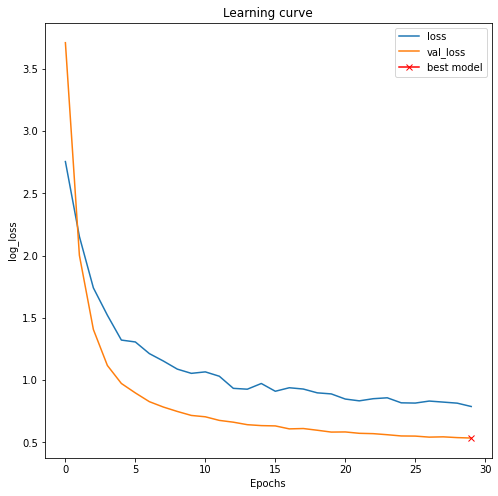

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(model_vgg.history.history["loss"], label="loss")
plt.plot(model_vgg.history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(model_vgg.history.history["val_loss"]), np.min(model_vgg.history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();
plt.show()
#plt.savefig('/tmp/'+str(config['Model'])+'/train_loss.png')

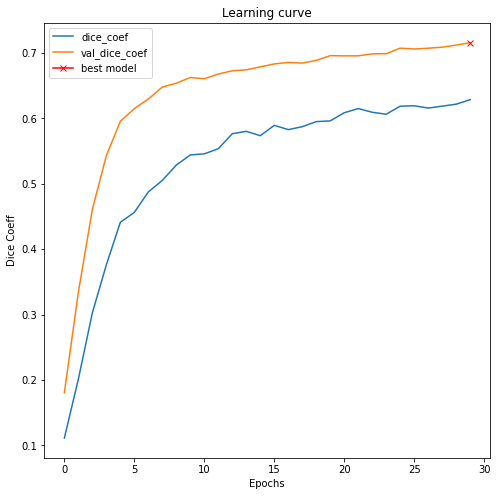

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(model_vgg.history.history["dice_coef"], label="dice_coef")
plt.plot(model_vgg.history.history["val_dice_coef"], label="val_dice_coef")
plt.plot( np.argmax(model_vgg.history.history["val_dice_coef"]), np.max(model_vgg.history.history["val_dice_coef"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Dice Coeff")
plt.legend();
plt.show()
#plt.savefig('./Results/plots/'+str(config['Model'])+'/train_dice.png')

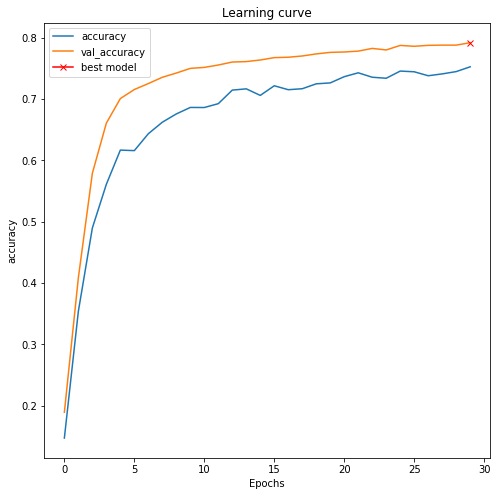

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(model_vgg.history.history["accuracy"], label="accuracy")
plt.plot(model_vgg.history.history["val_accuracy"], label="val_accuracy")
plt.plot( np.argmax(model_vgg.history.history["val_accuracy"]), np.max(model_vgg.history.history["val_accuracy"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend();
plt.show()
# plt.savefig('./Results/plots/'+str(config['Model'])+'/train_accuracy.png

In [ ]:
print(model_vgg.evaluate_segmentation( 
    inp_images_dir="/content/drive/MyDrive/assignment3/A3_Dataset/dataset1_splitted/annotations_prepped_test"  , 
    annotations_dir="/content/drive/MyDrive/assignment/A3_Dataset/dataset1_splitted/images_prepped_test",
    ) 
)

101it [00:52,  1.93it/s]

{'frequency_weighted_IU': 0.39333882789083585, 'mean_IU': 0.03656461466636201, 'class_wise_IU': array([4.00092075e-01, 1.07921100e-05, 0.00000000e+00, 1.18310719e-04,
       1.27893593e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.37198577e-03, 4.37144820e-04, 5.25596552e-05])}


In [ ]:
his_vgg = model_vgg.history

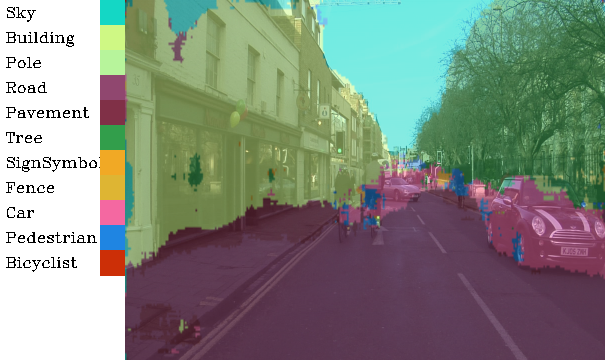

In [ ]:
pred_img = model_vgg.predict_segmentation(
    inp="/content/drive/MyDrive/Datasets/dataset1_splitted/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/pred_img.png", overlay_img=True, show_legends=True,
    class_names = [ "Sky", "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]
)

from IPython.display import Image
Image('/tmp/pred_img.png')

###9. SegNet with ResNet50 Backbone and Transfer learning

In [ ]:
from keras_segmentation.models.segnet import resnet50_segnet
model_res = resnet50_segnet(n_classes = 11, input_height=320, input_width=640 )

94658560/94653016 [==============================] - 1s 0us/step


In [ ]:
model_res.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 320, 640, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_5 (ZeroPadding2D (None, 326, 646, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 160, 320, 64) 9472        zero_padding2d_5[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 160, 320, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

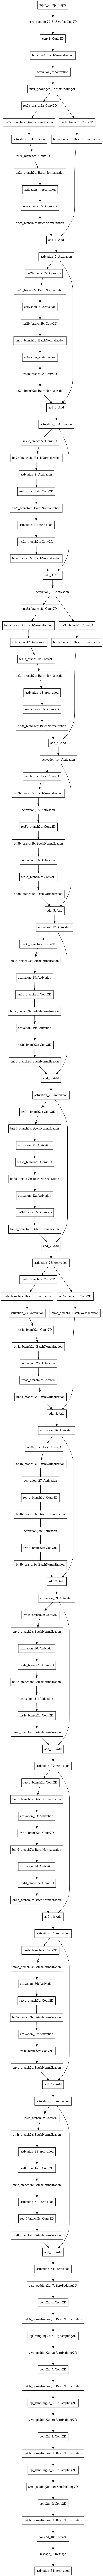

In [ ]:
plot_model(model_res)

In [ ]:
batch_size= 8
history_res = model_res.train(
    train_images =  "/content/drive/Mydrive/A3_Dataset/dataset1_splitted/images_prepped_train/",
    train_annotations = "/content/drive/Mydrive/A3_Dataset/dataset1_splitted/annotations_prepped_train/",
    validate=True,
    val_images="/content/drive/Mydrive/A3_Dataset/dataset1_splitted/images_prepped_valid",
    val_annotations="/content/drive/Mydrive/A3_Dataset/dataset1_splitted/annotations_prepped_valid",
    checkpoints_path = "/tmp/res_segnet_2001" , 
    epochs=30,
    do_augment=True, # enable augmentation 
    augmentation_name = 'aug_all',
    verify_dataset=False,
    batch_size = batch_size,
    val_batch_size = batch_size,
    steps_per_epoch = np.ceil(294 / batch_size),
    val_steps_per_epoch = np.ceil(73 / batch_size),
    )

/content/gdrive/MyDrive/Colab Notebooks/keras_segmentation/train.py:170: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  use_multiprocessing=gen_use_multiprocessing)
/usr/local/lib/python3.7/dist-packages/imgaug/augmenters/segmentation.py:191: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = segmentation.slic(image, n_segments=n_segments_samples[i], compactness=10)


Epoch 1/30
37/37 [==============================] - 129s 3s/step - loss: 2.6102 - accuracy: 0.1438 - dice_coef: 0.1184 - val_loss: 2.5849 - val_accuracy: 0.1388 - val_dice_coef: 0.1294
Epoch 2/30
37/37 [==============================] - 125s 3s/step - loss: 2.1202 - accuracy: 0.2871 - dice_coef: 0.1877 - val_loss: 1.8723 - val_accuracy: 0.3198 - val_dice_coef: 0.2288
Epoch 3/30
37/37 [==============================] - 124s 3s/step - loss: 1.7981 - accuracy: 0.4139 - dice_coef: 0.2584 - val_loss: 1.4596 - val_accuracy: 0.4816 - val_dice_coef: 0.3284
Epoch 4/30
37/37 [==============================] - 119s 3s/step - loss: 1.5875 - accuracy: 0.4944 - dice_coef: 0.3152 - val_loss: 1.1964 - val_accuracy: 0.5806 - val_dice_coef: 0.4097
Epoch 5/30
37/37 [==============================] - 126s 3s/step - loss: 1.4327 - accuracy: 0.5533 - dice_coef: 0.3663 - val_loss: 1.0311 - val_accuracy: 0.6449 - val_dice_coef: 0.4742
Epoch 6/30
37/37 [==============================] - 118s 3s/step - loss: 1.

###10. Results with SegNet (ResNet-50 backbone)

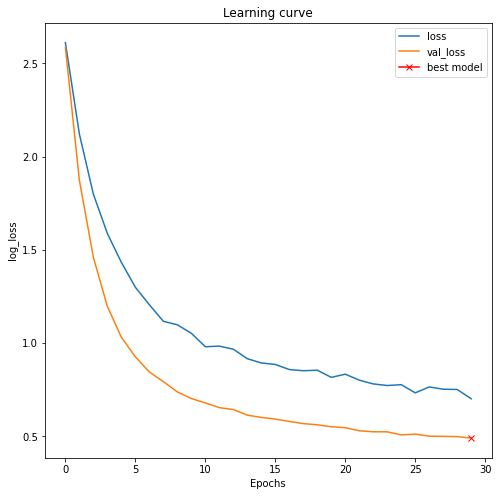

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(model_res.history.history["loss"], label="loss")
plt.plot(model_res.history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(model_res.history.history["val_loss"]), np.min(model_res.history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();
plt.show()
#plt.savefig('/tmp/'+str(config['Model'])+'/train_loss.png')

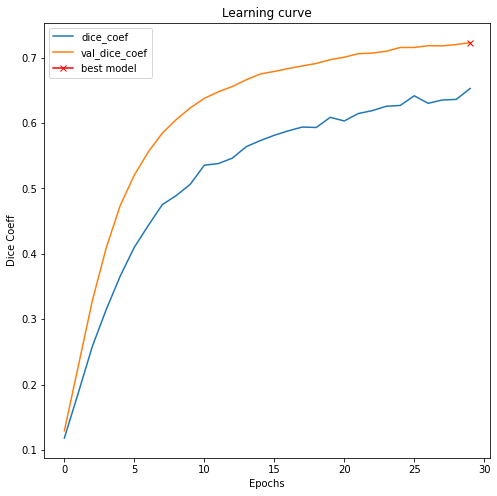

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(model_res.history.history["dice_coef"], label="dice_coef")
plt.plot(model_res.history.history["val_dice_coef"], label="val_dice_coef")
plt.plot( np.argmax(model_res.history.history["val_dice_coef"]), np.max(model_res.history.history["val_dice_coef"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Dice Coeff")
plt.legend();
plt.show()
#plt.savefig('./Results/plots/'+str(config['Model'])+'/train_dice.png')

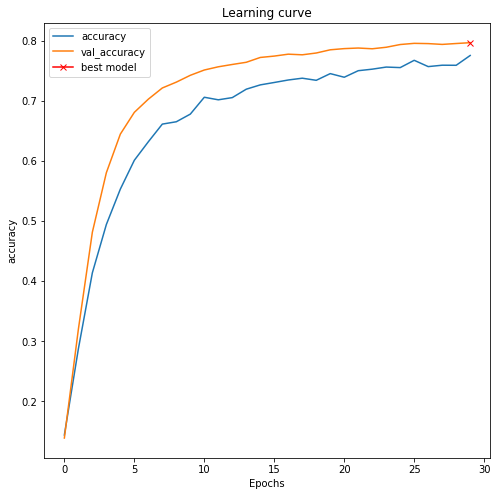

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(model_res.history.history["accuracy"], label="accuracy")
plt.plot(model_res.history.history["val_accuracy"], label="val_accuracy")
plt.plot( np.argmax(model_res.history.history["val_accuracy"]), np.max(model_res.history.history["val_accuracy"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend();
plt.show()
# plt.savefig('./Results/plots/'+str(config['Model'])+'/train_accuracy.png

In [ ]:
his_res = model_res.history

In [ ]:
print(model_res.evaluate_segmentation( 
    inp_images_dir="/content/drive/MyDrive/assignment3/A3_Dataset/dataset1_splitted/annotations_prepped_test"  , 
    annotations_dir="/content/drive/MyDrive/assignment3/A3_Datasets/dataset1_splitted/images_prepped_test",
    ) 
)

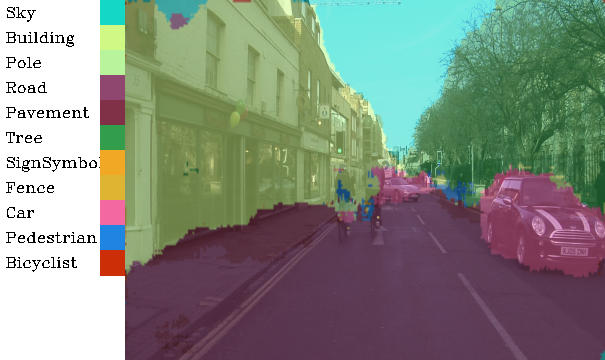

In [ ]:
pred_img_res = model_res.predict_segmentation(
    inp="/content/drive/MyDrive/assignment3/A3_Dataset/dataset1_splitted/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/pred_img_res.png", overlay_img=True, show_legends=True,
    class_names = [ "Sky", "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]
)

from IPython.display import Image
Image('/tmp/pred_img_res.png')

###11. Predicting all the test examples using checkpoints of VGG-16 and ResNet-50

In [ ]:
from keras_segmentation.predict import predict_multiple


predict_multiple( 
	checkpoints_path="/tmp/vgg_segnet_111", 
	inp_dir="/content/drive/MyDrive/A3_Datasets/dataset1_splitted/annotations_prepped_test", 
	out_dir="outputs_vgg/" 
)

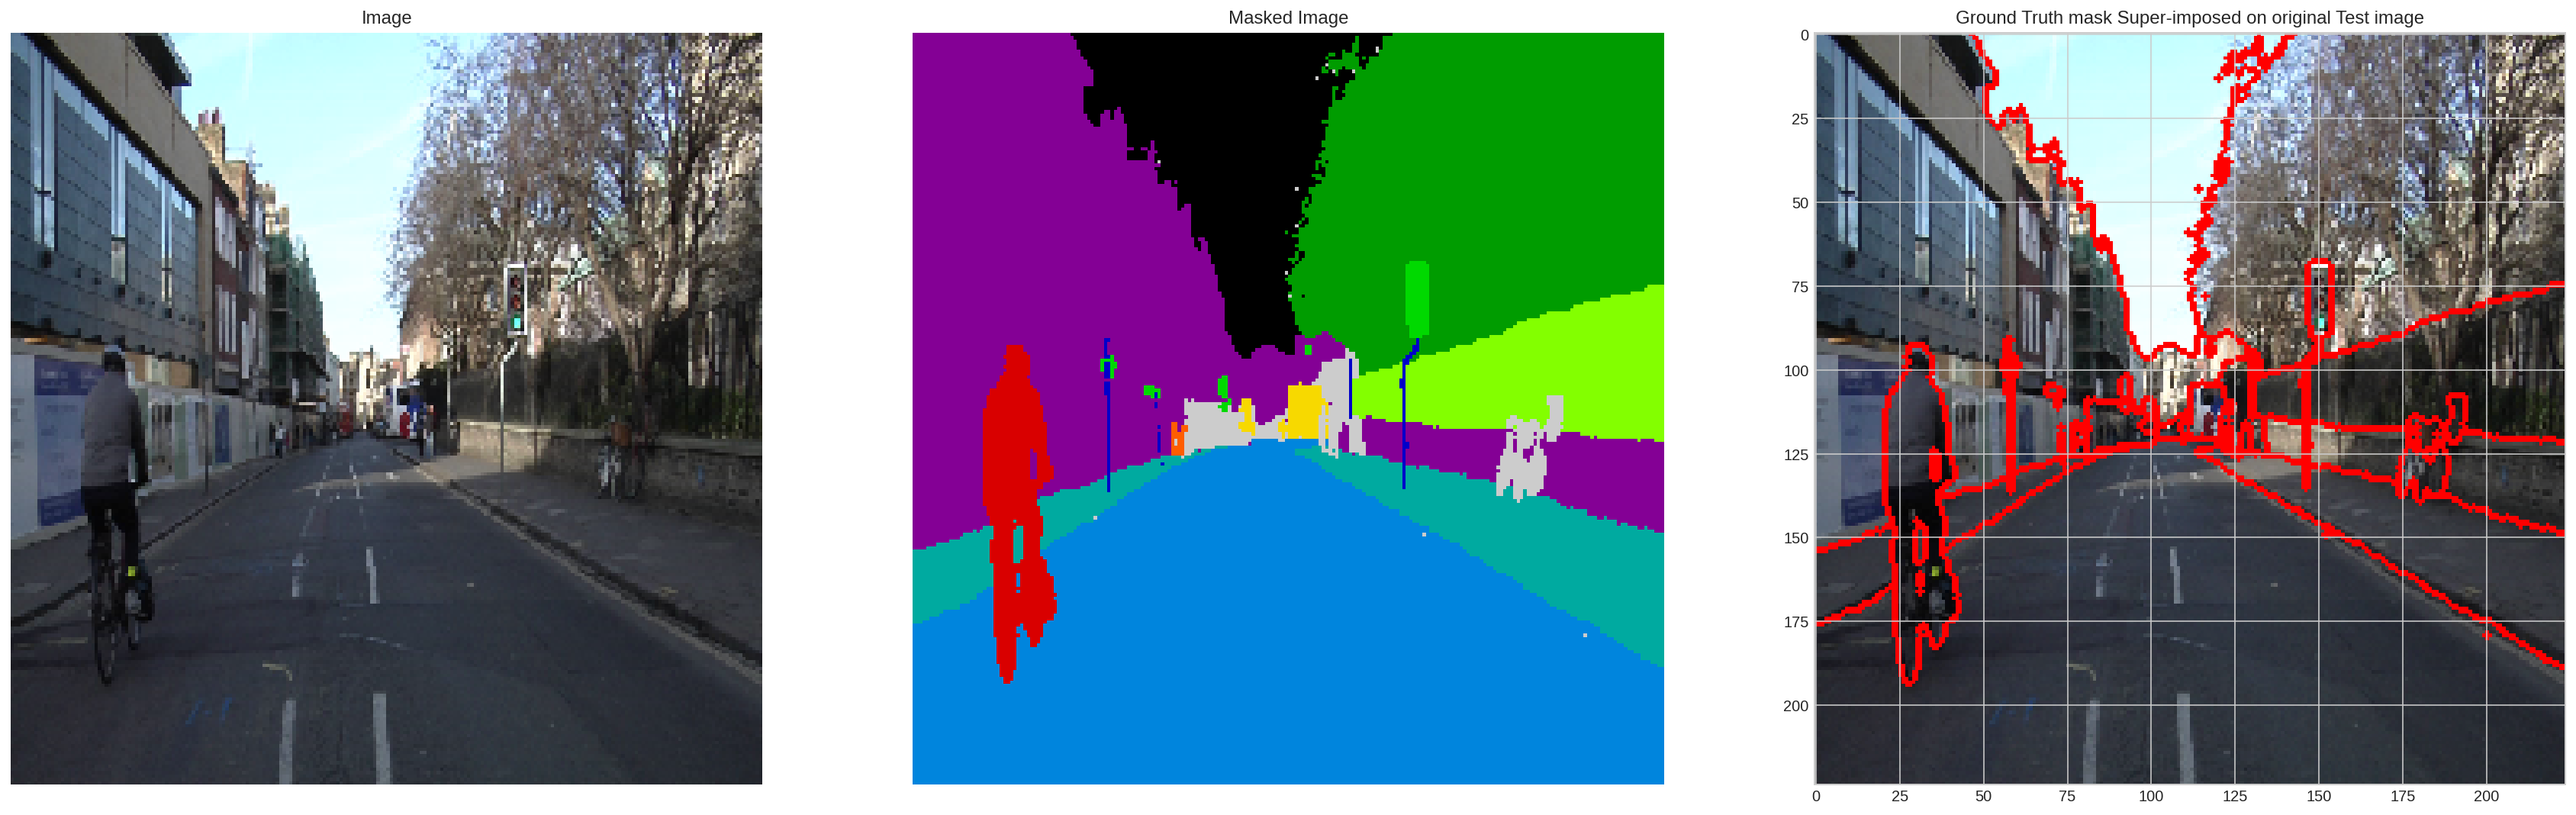

In [ ]:
plt.figure(figsize=(30,30))
plt.subplot(1, 3, 1)
plt.imshow(test_images[100])
plt.axis('off')
plt.title('Image')

#plotting ground label
plt.subplot(1, 3, 2)
plt.imshow(test_labels[100], cmap='nipy_spectral')
plt.axis('off')
plt.title('Masked Image')
plt.show


plt.subplot(1, 3, 3)
edges_pz = mark_boundaries(test_images[100], test_labels[100], color=(1,0,0), mode='thin')
plt.imshow(edges_pz)
plt.title('Ground Truth mask Super‐imposed on original Test image')
plt.show()

In [ ]:
from keras_segmentation.predict import predict_multiple


predict_multiple( 
	checkpoints_path="/tmp/res_segnet_2001", 
	inp_dir="/content/drive/MyDrive/Datasets/dataset1_splitted/annotations_prepped_test", 
	out_dir="outputs_res/" 
)